In [1]:
import numpy as np
import keras

In [2]:
#modelo sequential
model = keras.models.Sequential([keras.layers.Dense(units=1 ,input_shape=[1])])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
#compilacion del modelo
model.compile(optimizer='sgd',loss='mean_squared_error')

In [6]:
#entradas y salidas para el entrenamiento
X = np.array([1.0 ,2.0 ,3.0 ,4.0 ,5.0 ], dtype = float)
Y = np.array([11.0 ,21.0 ,31.0 ,41.0 ,51.0 ], dtype = float)

In [20]:
#entrenamiento del modelo
model.fit(X,Y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0340
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0338
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0336
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0333
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0331
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0329
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0327
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0324
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0322
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0320


In [27]:
#hacer predición
print(model.predict(np.array([6.0]).reshape(1, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[60.723404]]


Keras para Clasificación

In [29]:
import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [41]:
#Clasificacion de datos sinteticos
X,y = make_classification(n_samples=100, n_features=5, n_classes=2)

# Division de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#conversion de etiquetas a codificacion one-hot
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_test)

#creacion de instancia secuencial
model = keras.models.Sequential()

#añadir capas ocultas,neuronas ,activacion 'relu'
model.add(keras.layers.Dense(10, input_shape=(X_train.shape[1],),activation='relu'))

#añadir capa de salida con 2 neuronas una para cada clase y activacion softmax
model.add(keras.layers.Dense(2, activation='softmax'))

#compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#entrenar el modelo
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical))

#evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print('Perdida en el conjunto de prueba:', loss)
print('Precisión en el conjunto de prueba:', accuracy)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7977 - loss: 0.5461 - val_accuracy: 0.8000 - val_loss: 0.4898
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7508 - loss: 0.6063 - val_accuracy: 0.8000 - val_loss: 0.4743
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7820 - loss: 0.5300 - val_accuracy: 0.8500 - val_loss: 0.4593
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7961 - loss: 0.4992 - val_accuracy: 0.8500 - val_loss: 0.4447
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7883 - loss: 0.5075 - val_accuracy: 0.8500 - val_loss: 0.4305
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7750 - loss: 0.5028 - val_accuracy: 0.8500 - val_loss: 0.4168
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8141 - loss: 0.4690 - val_accuracy: 0.8500 - val_loss: 0.4037
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8086 - loss: 0.4521 - val_accuracy: 0.8500 - val_loss: 0.3912

Keras para regresión

In [42]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [45]:
#carga del conjunto de datos
housing = fetch_california_housing()

#crear los datos de entrenamiento,validacion y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_valid',X_valid.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('y_valid',y_valid.shape)

X_train (11610, 8)
X_test (5160, 8)
X_valid (3870, 8)
y_train (11610,)
y_test (5160,)
y_valid (3870,)


In [48]:
#escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#crecion del modelo   "adam" o "rmsprop
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

#compilar el modelo
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

#entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6939 - mean_absolute_percentage_error: 47.2017 - root_mean_squared_error: 1.2720 - val_loss: 0.8021 - val_mean_absolute_percentage_error: 33.3955 - val_root_mean_squared_error: 0.8956
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5664 - mean_absolute_percentage_error: 30.6748 - root_mean_squared_error: 0.7523 - val_loss: 1.8667 - val_mean_absolute_percentage_error: 31.1421 - val_root_mean_squared_error: 1.3663
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6467 - mean_absolute_percentage_error: 29.2339 - root_mean_squared_error: 0.7921 - val_loss: 0.5381 - val_mean_absolute_percentage_error: 29.7863 - val_root_mean_squared_error: 0.7336
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4602 - mean_absolute_percentage_error: 28.0436 - root_mean_squared_error: 0.6781 - val_loss: 0.4459 - val_mean_absolute_percentage_error: 27.2333 - val_root_mean_squared_error: 0.6678
Epoch 5/10
363/363 ━━━━━━━━

<Axes: >

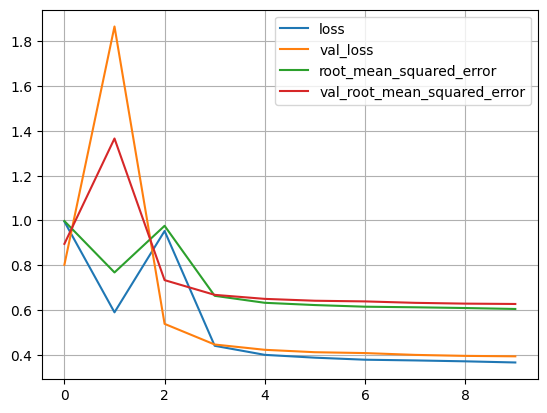

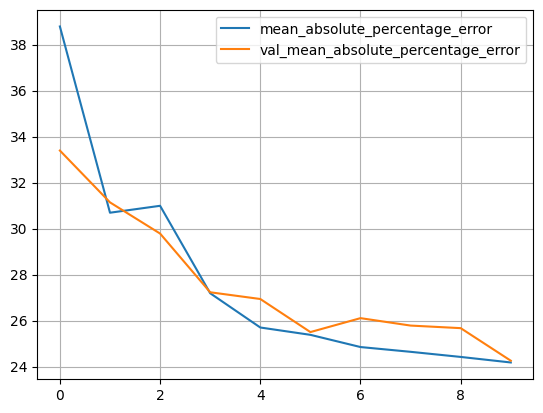

In [49]:
#graficar el hstorial de entrenamiento
dfhistory = pd.DataFrame(history.history)
dfhistory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfhistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)

In [51]:
#evaluar el modelo entrenamiento
loss, rmse, mape = model.evaluate(X_train, y_train)
print('Evaluacion del modelo en el conjunto de datos de entrenamiento')
print('Perdida en el conjunto de entrenamiento:', loss)
print('RMSE en el conjunto de entrenamiento:', rmse)
print('MAPE en el conjunto de entrenamiento:', mape)

#evaluacion en validacion
loss, rmse, mape = model.evaluate(X_valid, y_valid)
print('Evaluacion del modelo en el conjunto de datos de validacion')
print('Perdida en el conjunto de validacion:', loss)
print('RMSE en el conjunto de validacion:', rmse)
print('MAPE en el conjunto de validacion:', mape)

#evaluacion en prueba
loss, rmse, mape = model.evaluate(X_test, y_test)
print('Evaluacion del modelo en el conjunto de datos de prueba')
print('Perdida en el conjunto de prueba:', loss)
print('RMSE en el conjunto de prueba:', rmse)
print('MAPE en el conjunto de prueba:', mape)

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3669 - mean_absolute_percentage_error: 23.3358 - root_mean_squared_error: 0.6052
Evaluacion del modelo en el conjunto de datos de entrenamiento
Perdida en el conjunto de entrenamiento: 0.35871681571006775
RMSE en el conjunto de entrenamiento: 0.5989297032356262
MAPE en el conjunto de entrenamiento: 23.135663986206055
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4013 - mean_absolute_percentage_error: 26.0722 - root_mean_squared_error: 0.6333
Evaluacion del modelo en el conjunto de datos de validacion
Perdida en el conjunto de validacion: 0.39317986369132996
RMSE en el conjunto de validacion: 0.6270405650138855
MAPE en el conjunto de validacion: 24.257356643676758
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3731 - mean_absolute_percentage_error: 22.3222 - root_mean_squared_error: 0.6100
Evaluacion del modelo en el conjunto de datos de prueba
Perdida en el conjunto de prueba: 0.3947005271911621
RMSE en el conjunto de prueba: 